In [1]:
import pandas as pd
import numpy as np

In [2]:
!ls

Baseline_Modelling.ipynb   gia2105_ML4FG_Proposal.pdf
EDA.ipynb                  lightning_logs
data


In [3]:
import os
os.listdir('data/abundance/')

['abundance_Cirrhosis.txt',
 'abundance_WT2D.txt',
 'abundance_Colorectal.txt',
 'abundance_Obesity.txt',
 'abundance_IBD.txt',
 'abundance_T2D.txt']

In [4]:
df = pd.read_csv( 'data/abundance/abundance_Cirrhosis.txt', sep = '\t')

In [5]:
dfs = []
for file in os.listdir('data/abundance/'):
    df = pd.read_csv('data/abundance/' + file, sep = '\t') 
    df.index = df.dataset_name
    dfs.append(df.T.drop('dataset_name') )

In [6]:
markers = []
for file in os.listdir('data/marker/'):
    df = pd.read_csv('data/marker/' + file, sep = '\t') 
    df.index = df.dataset_name
    markers.append(df.T.drop('dataset_name') )

/Users/george/anaconda2/envs/dnabert/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/Users/george/anaconda2/envs/dnabert/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,

In [9]:
[df.columns.str.contains('k__').sum() for df in dfs]

[542, 381, 503, 465, 443, 572]

In [10]:
df = dfs[0]
cols = []
[cols.append( df.columns[df.columns.str.contains('k__')] ) for df in dfs]

[None, None, None, None, None, None]

In [7]:
marker_cols =[]
[marker_cols.append( df.columns[df.columns.str.contains('gi[|]')] ) for df in markers]

[None, None, None, None, None, None]

In [9]:
marker_cols[0].shape

(108034,)

In [13]:
marker_cols[0].isin(marker_cols[1]).mean()

0.8081900142547717

In [11]:
cols[0].isin(cols[1]).sum()

327

In [12]:
dfs[0].head()

dataset_name,sampleID,subjectID,bodysite,disease,age,gender,country,sequencing_technology,pubmedid,camp,...,k__Bacteria|p__Fusobacteria|c__Fusobacteriia|o__Fusobacteriales|f__Fusobacteriaceae|g__Cetobacterium|s__Cetobacterium_somerae,k__Bacteria|p__Fusobacteria|c__Fusobacteriia|o__Fusobacteriales|f__Fusobacteriaceae|g__Fusobacterium|s__Fusobacterium_varium,k__Bacteria|p__Proteobacteria|c__Deltaproteobacteria|o__Desulfovibrionales|f__Desulfovibrionaceae|g__Bilophila|s__Bilophila_sp_4_1_30,k__Bacteria|p__Proteobacteria|c__Gammaproteobacteria|o__Aeromonadales|f__Aeromonadaceae|g__Aeromonas|s__Aeromonas_veronii,k__Bacteria|p__Proteobacteria|c__Gammaproteobacteria|o__Enterobacteriales|f__Enterobacteriaceae|g__Escherichia|s__Escherichia_albertii,k__Bacteria|p__Proteobacteria|c__Gammaproteobacteria|o__Enterobacteriales|f__Enterobacteriaceae|g__Escherichia|s__Escherichia_fergusonii,k__Bacteria|p__Proteobacteria|c__Gammaproteobacteria|o__Enterobacteriales|f__Enterobacteriaceae|g__Klebsiella|s__Klebsiella_variicola,k__Bacteria|p__Proteobacteria|c__Gammaproteobacteria|o__Enterobacteriales|f__Enterobacteriaceae|g__Kosakonia|s__Kosakonia_radicincitans,k__Bacteria|p__Proteobacteria|c__Gammaproteobacteria|o__Enterobacteriales|f__Enterobacteriaceae|g__Pectobacterium|s__Pectobacterium_carotovorum,k__Bacteria|p__Proteobacteria|c__Gammaproteobacteria|o__Enterobacteriales|f__Enterobacteriaceae|g__Plesiomonas|s__Plesiomonas_shigelloides
Quin_gut_liver_cirrhosis,HD-10,hd-10,stool,n,40,female,china,Illumina,25079328,nd,...,0,0,0,0,0,0,0,0,0,0
Quin_gut_liver_cirrhosis.1,HD-11,hd-11,stool,n,38,female,china,Illumina,25079328,nd,...,0,0,0,0,0,0,0,0,0,0
Quin_gut_liver_cirrhosis.2,HD-12,hd-12,stool,n,40,male,china,Illumina,25079328,nd,...,0,0,0,0,0,0,0,0,0,0
Quin_gut_liver_cirrhosis.3,HD-13,hd-13,stool,n,56,female,china,Illumina,25079328,nd,...,0,0,0,0,0,0,0,0,0,0
Quin_gut_liver_cirrhosis.4,HD-14,hd-14,stool,n,51,male,china,Illumina,25079328,nd,...,0,0,0,0,0,0,0,0,0,0


In [23]:
cols[0].append( cols[1] ).unique()

Index(['k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales|f__Methanobacteriaceae|g__Methanobrevibacter|s__Methanobrevibacter_smithii',
       'k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales|f__Methanobacteriaceae|g__Methanobrevibacter|s__Methanobrevibacter_unclassified',
       'k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales|f__Methanobacteriaceae|g__Methanosphaera|s__Methanosphaera_stadtmanae',
       'k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Actinomycetaceae|g__Actinomyces|s__Actinomyces_graevenitzii',
       'k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Actinomycetaceae|g__Actinomyces|s__Actinomyces_odontolyticus',
       'k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Actinomycetaceae|g__Actinomyces|s__Actinomyces_turicensis',
       'k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Micrococcaceae|g__Rothia|s__Rothia_mucila

In [17]:
for i in range(len(cols)):
    print(dfs[i].index[0])
    print(cols[i].shape)
    for j in range(0, len(cols)):
            print(sum(cols[i].isin(cols[j]))/cols[i].shape[0])

Quin_gut_liver_cirrhosis
(542,)
1.0
0.6033210332103321
0.7416974169741697
0.6955719557195572
0.6752767527675276
0.8468634686346863
WT2D
(381,)
0.8582677165354331
1.0
0.916010498687664
0.8871391076115486
0.8766404199475065
0.910761154855643
Zeller_fecal_colorectal_cancer
(503,)
0.7992047713717694
0.6938369781312127
1.0
0.7534791252485089
0.7375745526838966
0.8449304174950298
Chatelier_gut_obesity
(465,)
0.810752688172043
0.7268817204301076
0.8150537634408602
1.0
0.8602150537634409
0.864516129032258
metahit
(443,)
0.8261851015801355
0.7539503386004515
0.837471783295711
0.9029345372460497
1.0
0.8826185101580135
t2dmeta_long
(572,)
0.8024475524475524
0.6066433566433567
0.743006993006993
0.7027972027972028
0.6835664335664335
1.0


In [14]:
for i in range(len(marker_cols)):
    print(dfs[i].index[0])
    print(marker_cols[i].shape)
    for j in range(0, len(marker_cols)):
            print(sum(marker_cols[i].isin(marker_cols[j]))/marker_cols[i].shape[0])

Quin_gut_liver_cirrhosis
(108034,)
1.0
0.8081900142547717
0.7052501990114224
0.8160949330766241
0.6885980339522743
0.7463668844993243
WT2D
(120553,)
0.724262357635231
1.0
0.6351397310726402
0.8075701143895216
0.5951075460585801
0.678373827279288
Zeller_fecal_colorectal_cancer
(91756,)
0.830365316709534
0.8344740398448058
1.0
0.866842495313658
0.7612908147696064
0.9068834735603122
Chatelier_gut_obesity
(119792,)
0.7359923868037932
0.8127003472685989
0.663967543742487
1.0
0.6197408841992788
0.7092042874315481
metahit
(83456,)
0.8913918711656442
0.8596386119631901
0.837003930214724
0.8895705521472392
1.0
0.8721721625766872
t2dmeta_long
(99568,)
0.8098284589426322
0.8213482243291017
0.8357303551341797
0.8532560662060099
0.7310380845251486
1.0


We have good overlap rates ==> good news for my project

In [ ]:
[dfs[i][cols[i]] for i in range(len(dfs))]

In [94]:
all_dfs = pd.concat( [dfs[i][cols[i]].astype(float) for i in range(len(dfs))], axis = 1).fillna(0)
all_dfs = all_dfs.T.groupby('dataset_name').sum().T
all_dfs['dataset'] = all_dfs.index.str.split('.').str[0]
all_dfs = all_dfs[['dataset']+list(all_dfs.columns[:-1])]
all_dfs = all_dfs.reset_index(drop=True)

In [49]:
all_dfs = all_dfs.fillna(0)

In [95]:
all_dfs.head()

dataset_name,dataset,k__Archaea|p__Euryarchaeota|c__Archaeoglobi|o__Archaeoglobales|f__Archaeoglobaceae|g__Archaeoglobaceae_unclassified,k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales|f__Methanobacteriaceae|g__Methanobacterium|s__Methanobacterium_unclassified,k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales|f__Methanobacteriaceae|g__Methanobrevibacter|s__Methanobrevibacter_smithii,k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales|f__Methanobacteriaceae|g__Methanobrevibacter|s__Methanobrevibacter_unclassified,k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales|f__Methanobacteriaceae|g__Methanosphaera|s__Methanosphaera_stadtmanae,k__Archaea|p__Euryarchaeota|c__Methanococci|o__Methanococcales|f__Methanocaldococcaceae|g__Methanocaldococcaceae_unclassified,k__Archaea|p__Euryarchaeota|c__Methanococci|o__Methanococcales|f__Methanocaldococcaceae|g__Methanocaldococcus|s__Methanocaldococcus_unclassified,k__Bacteria|p__Acidobacteria|c__Acidobacteriia|o__Acidobacteriales|f__Acidobacteriaceae|g__Acidobacteriaceae_unclassified,k__Bacteria|p__Acidobacteria|c__Acidobacteriia|o__Acidobacteriales|f__Acidobacteriaceae|g__Granulicella|s__Granulicella_unclassified,...,k__Eukaryota|p__Ascomycota|c__Saccharomycetes|o__Saccharomycetales|f__Saccharomycetaceae|g__Nakaseomyces|s__Candida_glabrata,k__Eukaryota|p__Ascomycota|c__Saccharomycetes|o__Saccharomycetales|f__Saccharomycetaceae|g__Naumovozyma|s__Naumovozyma_unclassified,k__Eukaryota|p__Ascomycota|c__Saccharomycetes|o__Saccharomycetales|f__Saccharomycetaceae|g__Saccharomyces|s__Saccharomyces_cerevisiae,k__Eukaryota|p__Ascomycota|c__Saccharomycetes|o__Saccharomycetales|f__Saccharomycetaceae|g__Saccharomycetaceae_unclassified,k__Eukaryota|p__Ascomycota|c__Saccharomycetes|o__Saccharomycetales|f__Saccharomycetales_noname|g__Candida|s__Candida_albicans,k__Eukaryota|p__Ascomycota|c__Saccharomycetes|o__Saccharomycetales|f__Saccharomycetales_noname|g__Candida|s__Candida_tropicalis,k__Eukaryota|p__Ascomycota|c__Schizosaccharomycetes|o__Schizosaccharomycetales|f__Schizosaccharomycetaceae|g__Schizosaccharomyces|s__Schizosaccharomyces_pombe,k__Eukaryota|p__Ascomycota|c__Schizosaccharomycetes|o__Schizosaccharomycetales|f__Schizosaccharomycetaceae|g__Schizosaccharomyces|s__Schizosaccharomyces_unclassified,k__Eukaryota|p__Eukaryota_noname|c__Eukaryota_noname|o__Eukaryota_noname|f__Eukaryota_noname|g__Entamoeba|s__Entamoeba_dispar,k__Eukaryota|p__Eukaryota_noname|c__Eukaryota_noname|o__Eukaryota_noname|f__Hexamitidae|g__Giardia|s__Giardia_intestinalis
0,Quin_gut_liver_cirrhosis,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Quin_gut_liver_cirrhosis,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Quin_gut_liver_cirrhosis,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Quin_gut_liver_cirrhosis,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Quin_gut_liver_cirrhosis,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [96]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

In [97]:
qq = all_dfs.loc[all_dfs.dataset.isin(['Zeller_fecal_colorectal_cancer', 'Chatelier_gut_obesity'])]

In [66]:
all_dfs.dataset.unique()

array(['Quin_gut_liver_cirrhosis', 'WT2D',
       'Zeller_fecal_colorectal_cancer', 'Chatelier_gut_obesity',
       'metahit', 't2dmeta_long', 't2dmeta_short'], dtype=object)

In [69]:
(all_dfs.dataset == 'WT2D' ).sum()

96

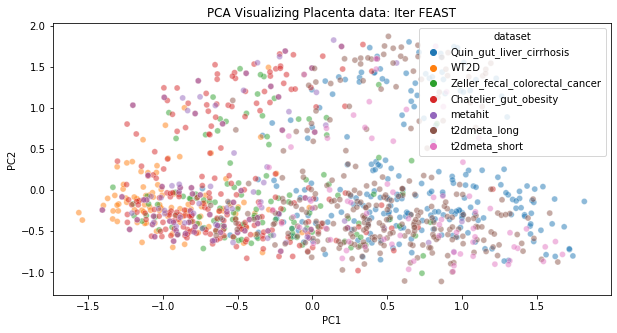

In [101]:
pc = PCA(n_components = 2)
plt.figure(figsize = (10,5))
x = pc.fit_transform( np.log10(1 + all_dfs.iloc[:, 1:].values) )
sns.scatterplot(x = x[:, 0], y = x[:, 1], hue = all_dfs['dataset'], alpha = 0.5)#.str.upper().str.strip())
plt.title('PCA Visualizing Placenta data: Iter FEAST')
plt.xlabel('PC1')
plt.ylabel('PC2')
#plt.xlim([-0.025, 0.001])
plt.show()

## Good news! It doesn't seem like we have severe batch effects, at least based on the PCA plot